<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/Heart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression , Random Forest , Boosting in Heart dataset

In [60]:
# importing some necessary libraries for handling data and visualising them
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
#importing the file into colab workspace
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [188]:
#reading the file
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [189]:
#getting the general information on the heart dataset
print("The basic information of heart dataset is\n",df.info())
print("Some important data are\n",df.describe())
print("The shape of the dataset is:\n",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
The basic information of heart dataset is
 None
Some important data are
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918

In [190]:
#checking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Visualising the dataset using graphs

In [191]:
col = df.columns
col

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [193]:
t1 = df.drop(columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"])

In [194]:
col1 = t1.columns

In [195]:
def plot(x):
  print(x ,"vs HeartDisease Plots")
  sns.countplot(df[x])
  plt.show()
  sns.boxplot(df[x])
  plt.show()
  sns.distplot(df[x])
  plt.show()

Age vs HeartDisease Plots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


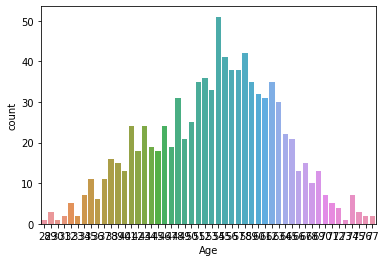

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


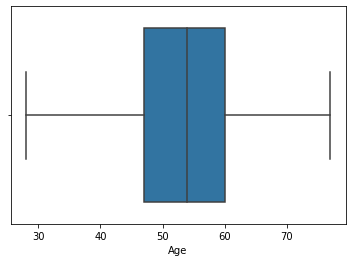

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


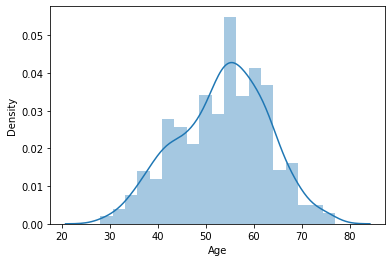

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


RestingBP vs HeartDisease Plots


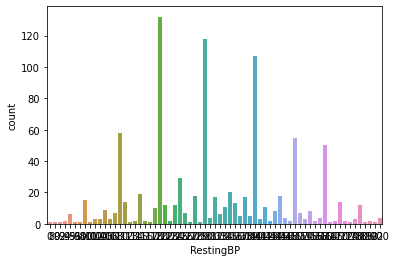

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


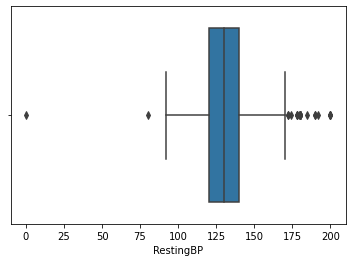

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


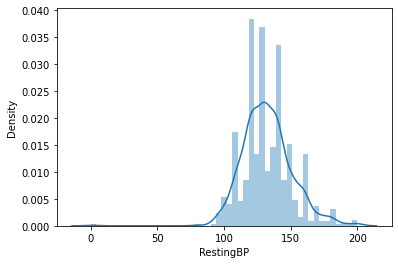

Cholesterol vs HeartDisease Plots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


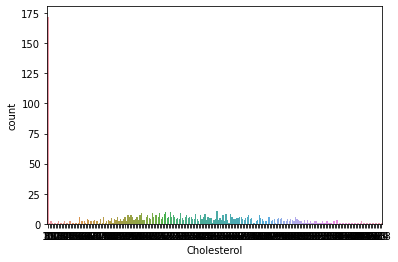

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


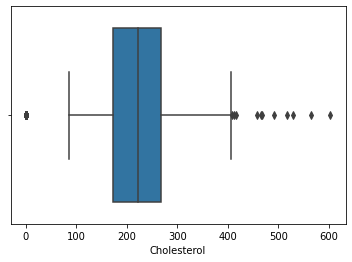

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


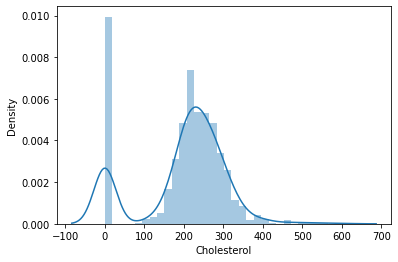

FastingBS vs HeartDisease Plots


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


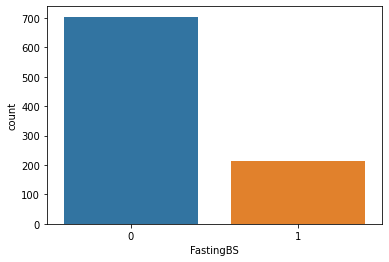

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


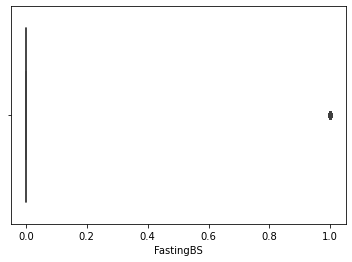

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


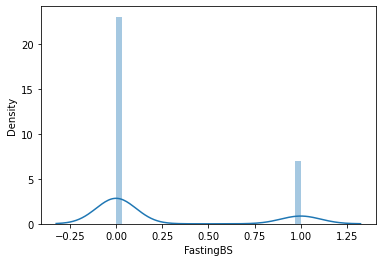

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MaxHR vs HeartDisease Plots


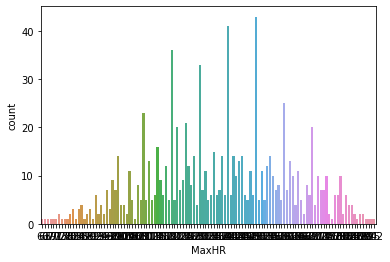

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


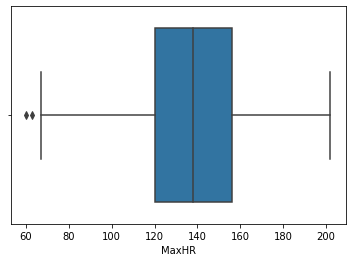

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


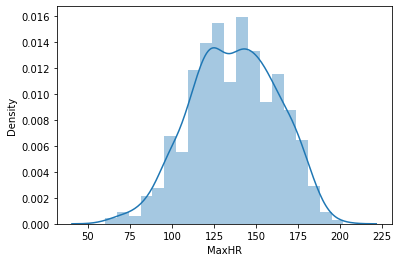

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Oldpeak vs HeartDisease Plots


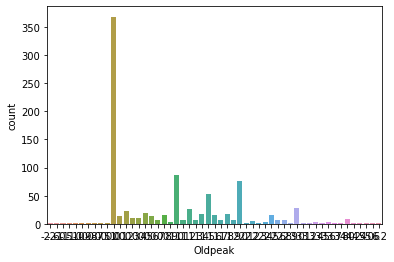

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


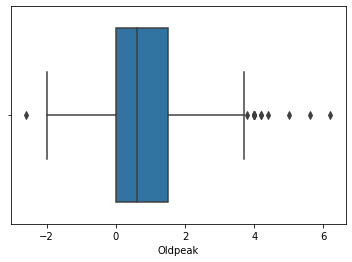

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


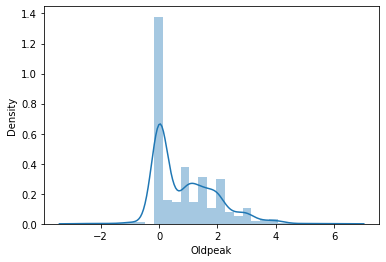

In [163]:
for i in range(0,len(col1)-1):
  plot(col1[i])

In [196]:
# from these graphs it is understood that there are some ouliers present in the data
from scipy.stats import iqr

In [197]:
def clean_out(i):
  q1 = df[i].quantile(0.25)
  q2 = df[i].quantile(0.50)
  q3 = df[i].quantile(0.75)
  inter = q3 -q1
  u = q3 + 1.5*inter
  l = q1 - 1.5*inter
  for j in df[i]:
    if j>u or j<l:
      df[i] = df[i].replace(j,q2)
   


In [211]:
for j in range(0,len(col1)):
  clean_out(col1[j])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


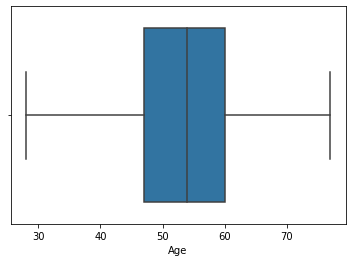

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


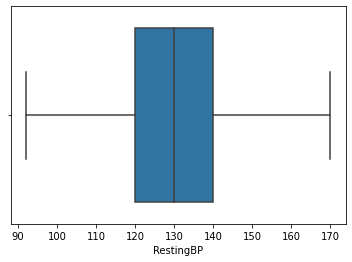

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


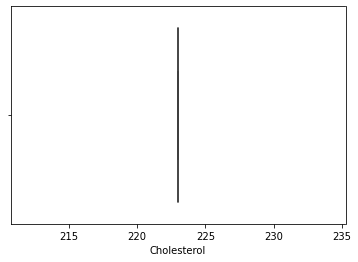

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


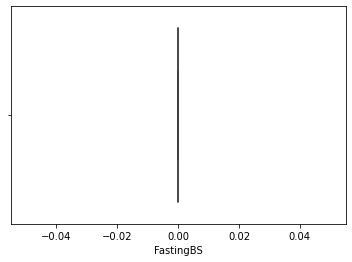

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


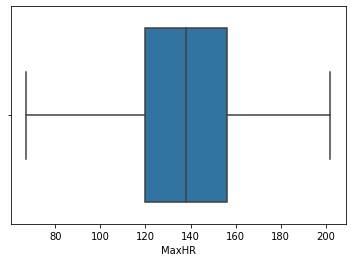

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


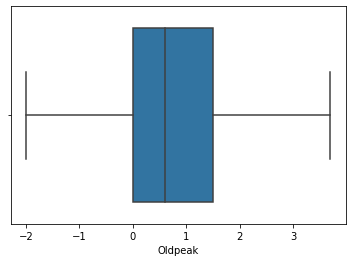

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


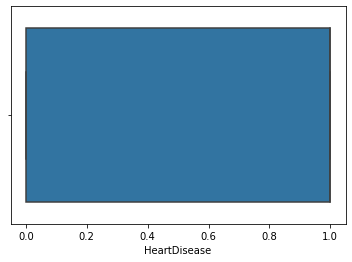

In [214]:
for i in range(0,len(col1)):
  sns.boxplot(df[col1[i]])
  plt.show()
  
  #all outliers have been removed

In [215]:
# hot coding using get dummies
final = pd.get_dummies(df,columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"])

In [216]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [217]:
final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,223,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,223,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,223,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,223,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,223,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


Implementing Machine Learning models

In [218]:
# creating traing and testing data
from sklearn.model_selection import train_test_split

In [219]:
x = final.drop(columns = "HeartDisease")
y = final.HeartDisease

In [249]:
x1 ,x2 ,y1,y2 = train_test_split(x,y,test_size = 0.2 , random_state = 9, stratify =y)

In [250]:
# checking the sizes of training and testing data
col2 = [x1,x2,y1,y2]
for i in range(0,4):
  print("Shape :",col2[i].shape)

Shape : (734, 20)
Shape : (184, 20)
Shape : (734,)
Shape : (184,)


In [251]:
# Implementation of Logistic Regression
from sklearn.linear_model import LogisticRegression

In [252]:
model = LogisticRegression()
model.fit(x1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [254]:
# checking the accuracy of model 1
from sklearn.metrics import accuracy_score
pred = model.predict(x2)
print("Accuracy of Logistic Regression Model is : ",accuracy_score(y2,pred)*100)
print("Accuracy of training dataset",accuracy_score(y1,model.predict(x1))*100)

Accuracy of Logistic Regression Model is :  87.5
Accuracy of training dataset 85.69482288828338


[[68 14]
 [ 9 93]]


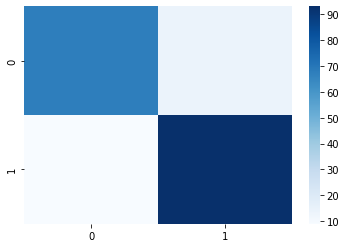

In [255]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2,pred))
sns.heatmap(confusion_matrix(y2,pred),cmap = "Blues")
plt.show()

In [256]:
# Generating ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [257]:
print("ROC score of the model is :",roc_auc_score(y2,pred))

ROC score of the model is : 0.8705164992826399


In [258]:
fpr, tpr ,_= roc_curve(y2,pred)

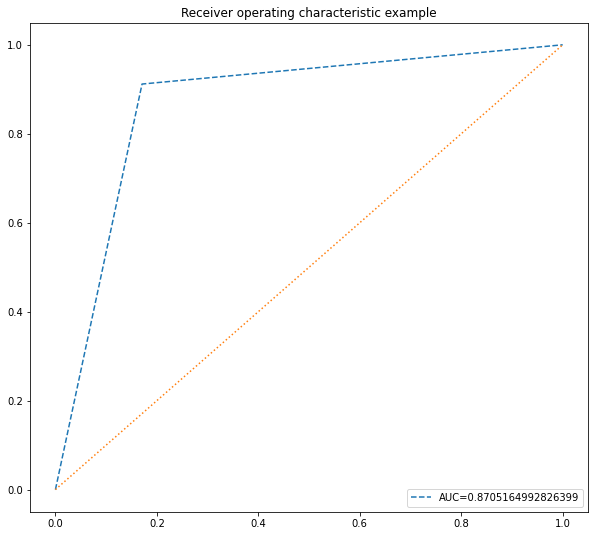

In [259]:
plt.figure(figsize=(10,9))
plt.plot(fpr,tpr,linestyle ="--" ,label="AUC="+str(roc_auc_score(y2,pred)))
plt.plot([0, 1],[0,1],linestyle='dotted')
plt.title("Receiver operating characteristic example")
plt.legend(loc=4)

In [260]:
# implementing Randomforest Model
from sklearn.ensemble import RandomForestClassifier
model2 =  RandomForestClassifier(n_estimators = 500,random_state= 21)

In [261]:
model2.fit(x1,y1)

RandomForestClassifier(n_estimators=500, random_state=21)

In [262]:
# checking accuracy of Random Forest
print(model2.score(x2,y2))
print("Accuracy of training dataset",accuracy_score(y1,model2.predict(x1)))

0.875
Accuracy of training dataset 1.0


In [263]:
# visualising random forest 
# Extracting a Single tree

In [264]:
from sklearn.tree import export_graphviz
from sklearn import tree

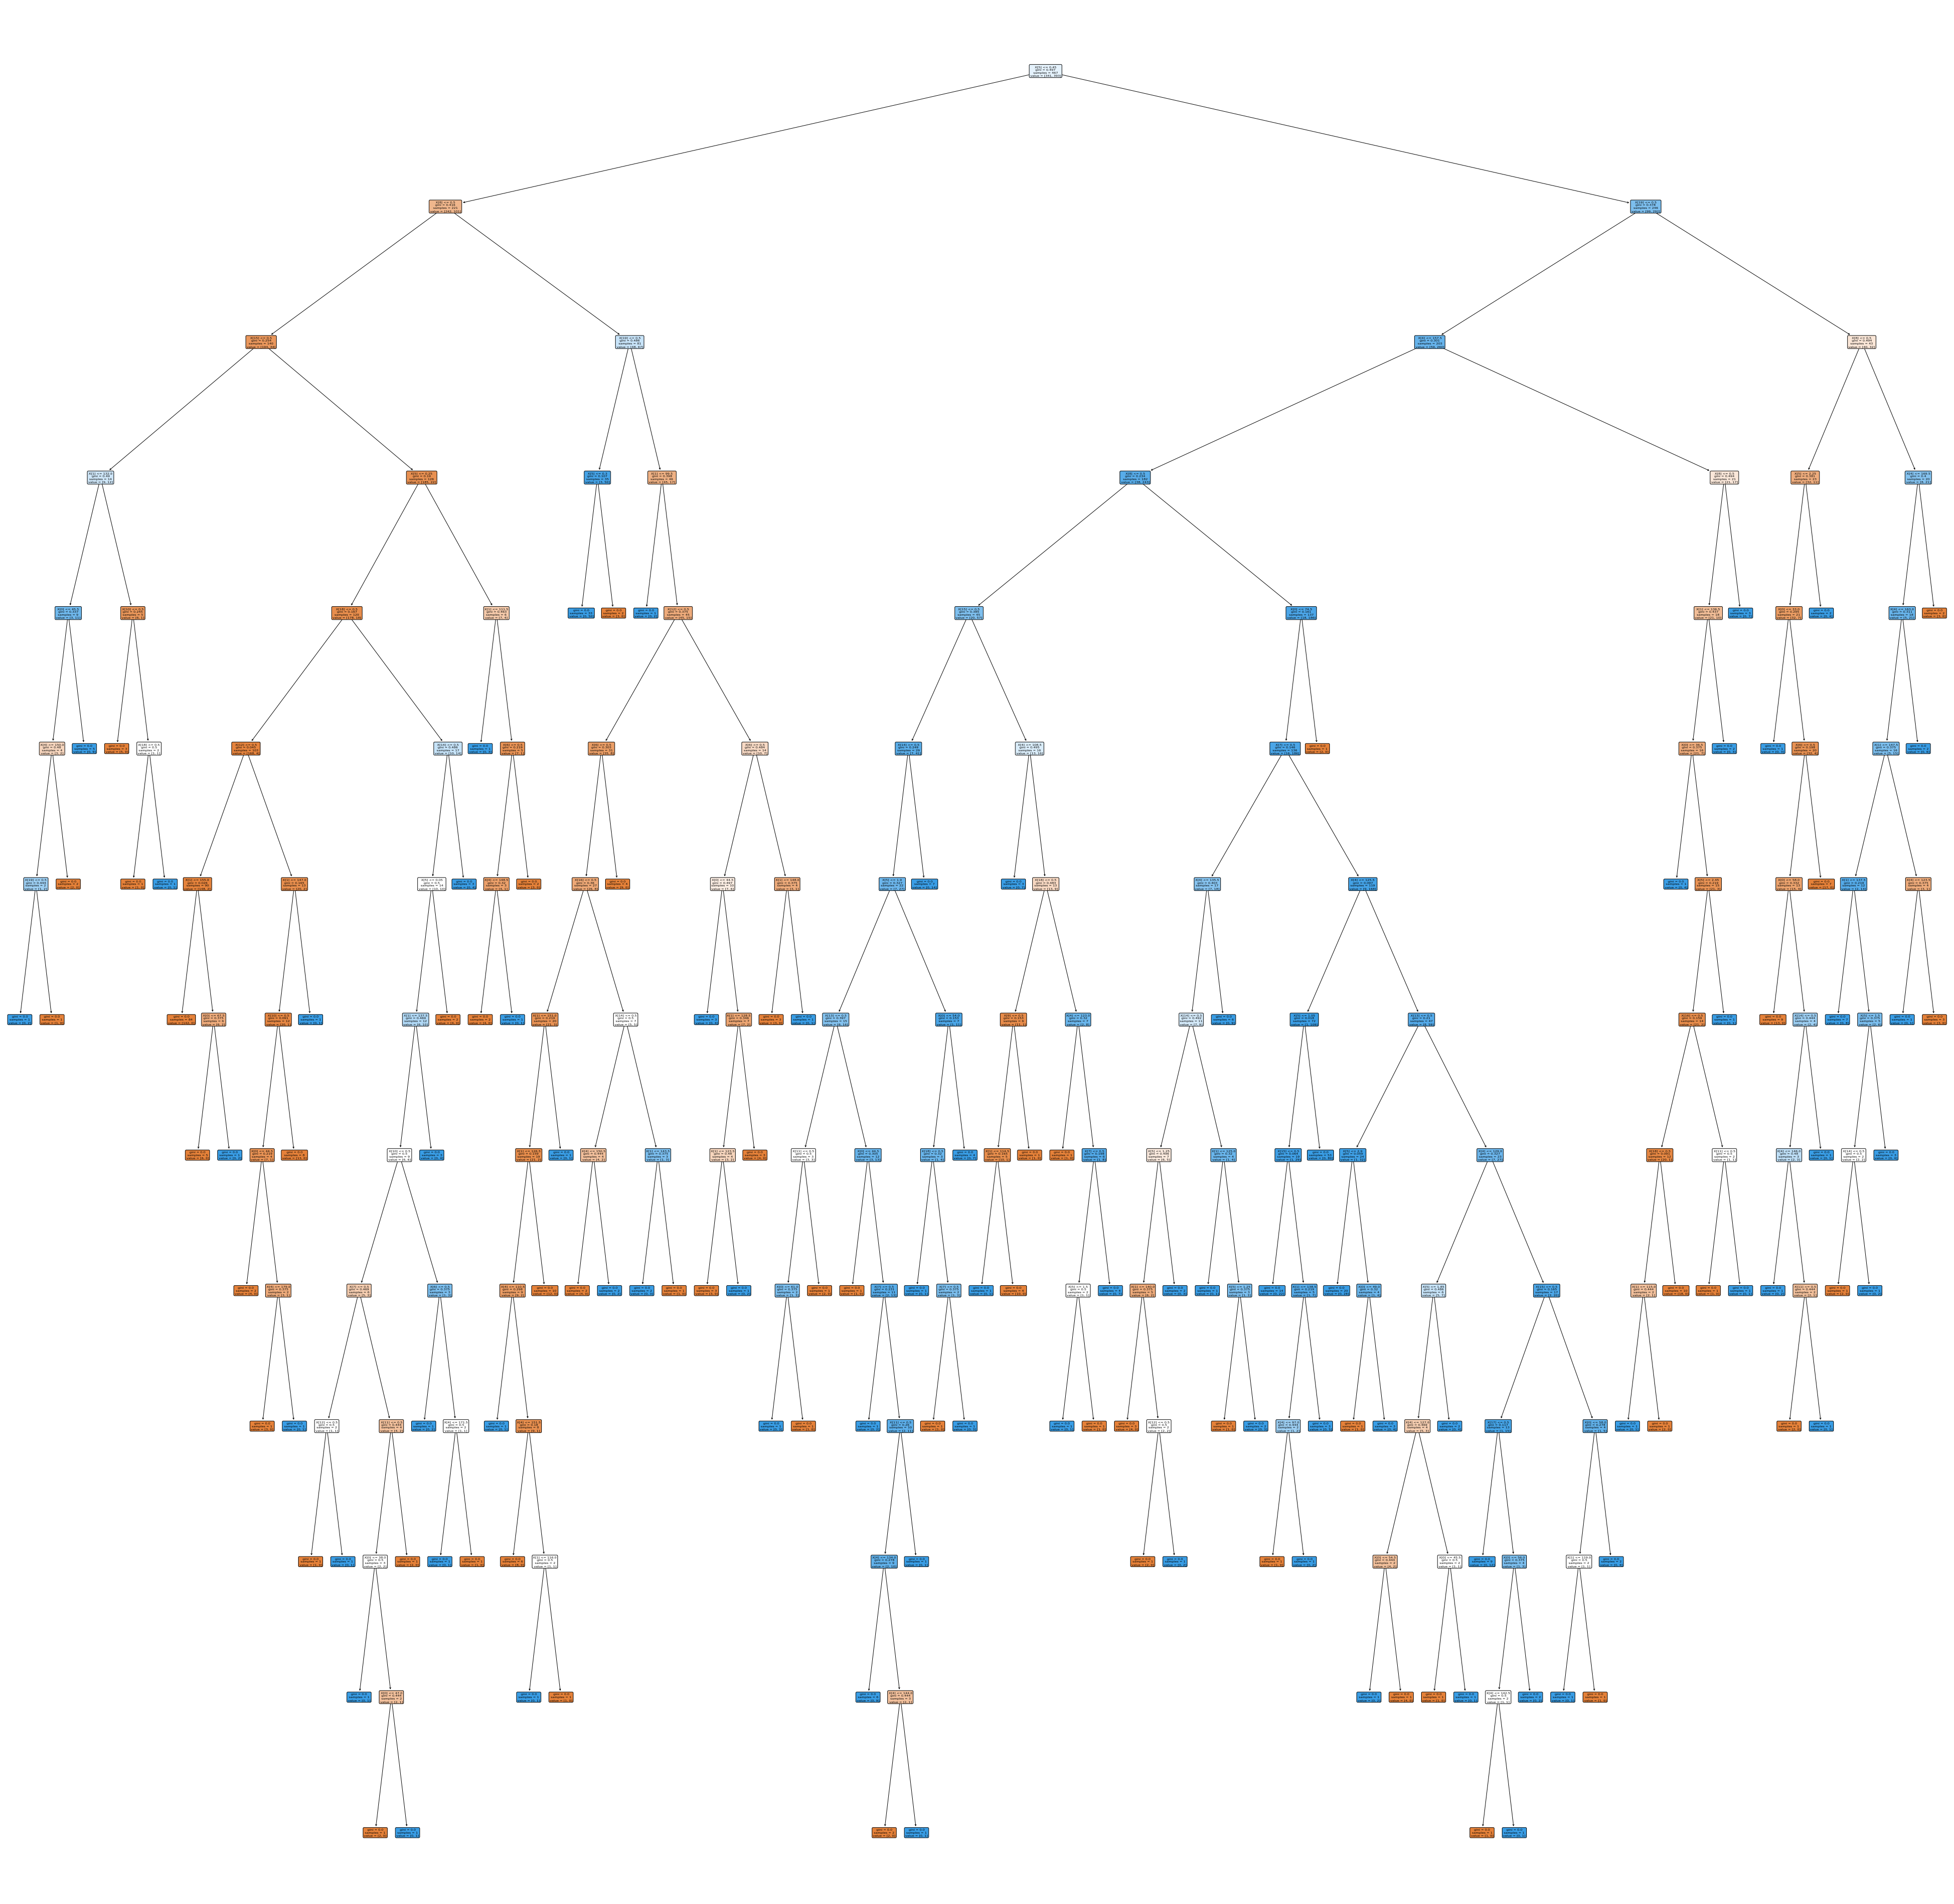

In [265]:
fig = plt.figure(figsize=(70,70))
p=tree.plot_tree(model2.estimators_[164],filled=True, impurity=True,rounded=True)

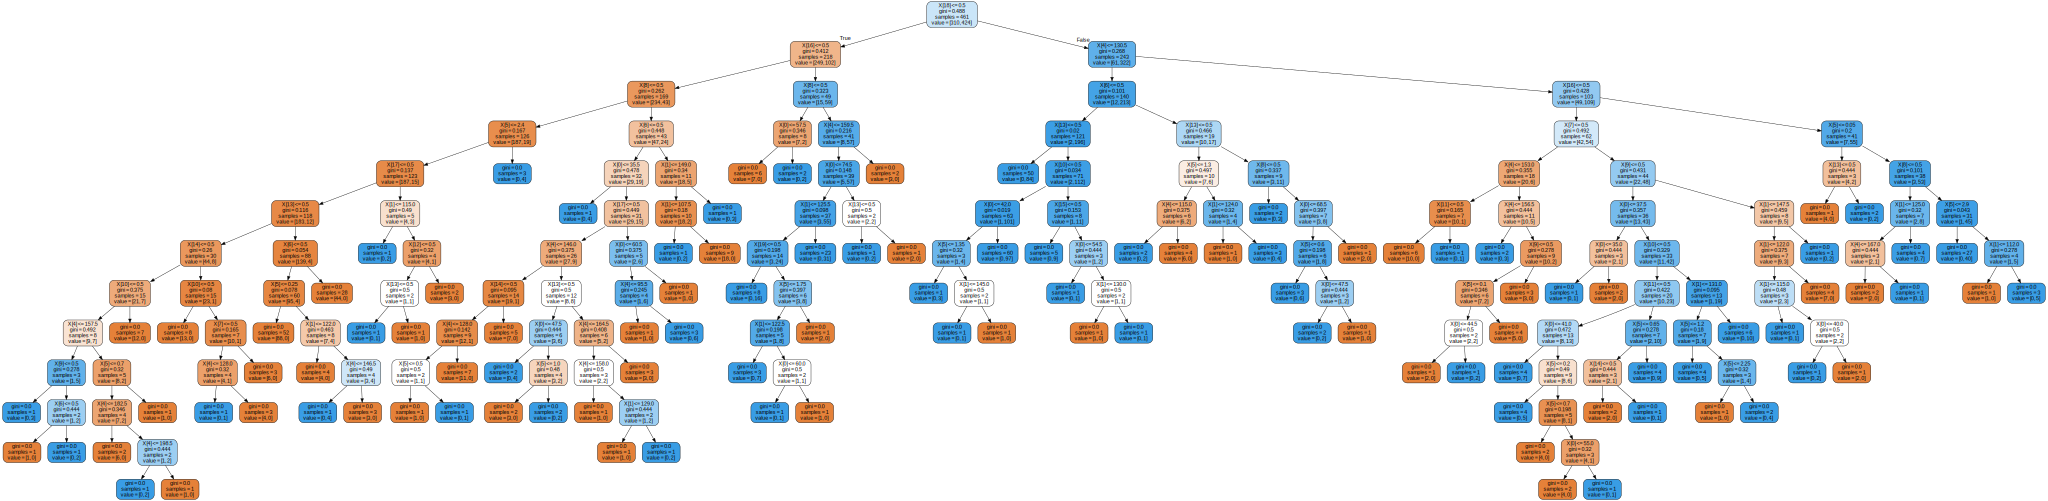

In [267]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model2.estimators_[99], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [268]:
# Classification Table
from sklearn.metrics import classification_report
print(classification_report(y2,pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [269]:
# implementing adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators= 100 ,learning_rate=3)

In [270]:
model3.fit(x1,y1)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=3,
                   n_estimators=100)

In [271]:
# checking the score of AdaBoost
print(model3.score(x2,y2))
print(model3.score(x1,y1))

0.8695652173913043
1.0


In [272]:
model4 = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=200,learning_rate=0.6)

In [273]:
model4.fit(x1,y1)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.6,
                   n_estimators=200)

In [274]:
model4.score(x2,y2)
print("Accuracy of Logistic Regression Model after boosting is : ",accuracy_score(y2,pred)*100)
print("Accuracy of training dataset",accuracy_score(y1,model4.predict(x1))*100)

Accuracy of Logistic Regression Model after boosting is :  87.5
Accuracy of training dataset 85.42234332425068
